## Delhi Weather Data

# Abstract

The main aim is to perform EDA and implemnt linear regression, decrease the complexity of the model or overfitting by performing ridge regularization, implementing random forest regression, Gradient boosting regression and to determine the best models using step wise regression, multi-colinearity and hyperparameter tuning using MSE, RMSE and R squared as the evaluation metrics.

# Dataset

This notebook contains data cleaning, visualisation,Linear Regressions, Interaction Effects and Regularization.
The dataset considered here is Historical weather of Delhi for year 1997 to 2016 : https://www.kaggle.com/mahirkukreja/delhi-weather-data/data

The dataset contains 20 columns with 100990 observations.

The description for the 20 features is given below:
datetime_utc : data recorded at specific dates and times(unique)
_conds:categorical variable -  Weather conditions such as 'Smoke', 'Clear', 'Haze', 'Unknown', 'Scattered Clouds',
       'Shallow Fog', 'Mostly Cloudy', 'Fog', 'Partly Cloudy',
       'Patches of Fog', 'Thunderstorms and Rain', 'Overcast', 'Rain',
       'Light Rain',etc
_dewptm: dewpoint temperature in C                                                                
_fog: Binary variable which depicts whether it is foggy or not affecting the visibility                                     
_hail: Binary variable which depicts whether it is going to hail                                                         
_heatindexm: Heat Index temperature (apparent temperature) which is a measure of how hot it feels to the human body         
_hum: Humidity                                                                                                        
_precipm: Precipitation                                                                                                      
_pressurem: pressure                                                                                                             
_rain: Binary variable which depicts whether it is going to rain or not                                                               
_snow: Binary variable which depicts whether it is going to snow or not                                                                       
_tempm: Temperature recorded at specific dates and times                                                                                          
_thunder: Binary variable which depicts whether it is going to thunder or not                                                                      
_tornado: Binary variable which depicts whether there is a tornado or not                                                                                
_vism: visibility                                                                                                                           
_wdird: categorical variable for wind direction with values such as North, South, East, West, etc                                                             
_wdire: wind direction in mph                                                                                                                             
_wgustm: wind gust                                                                                                                         
_windchillm: wind chill                                                                                                                     
_wspdm:wind speed                                                                                                                                                  
                                                                

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels as stats
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression # to perform linear regression
from sklearn.linear_model import LinearRegression # to perform logistci regression
import statsmodels.api as sm
from sklearn import linear_model # Scikit learn library that implements generalized linear models
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # To encode categorical variables
from sklearn.model_selection import train_test_split # To split train and test dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check multicolinearity
from sklearn.model_selection import cross_val_score # To perform cross validation

# Loading the Dataset using Pandas Libraries

In [2]:
data = pd.read_csv('testset.csv')

# Exploratory Data Analysis

In [3]:
data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [4]:
#handling column names - removing column names with '-'
columns_name=list(data.columns)
new_columns=list(i.replace("_","").strip() for i in columns_name)
data.columns=new_columns
data.columns

Index(['datetimeutc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

#### Summary Statistics

In [5]:
# displays the first five records/observations from the dataset
data.head()

,datetimeutc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [6]:
# summary statistics
data.describe()

,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wgustm,windchillm,wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [7]:
# gives us the data type of each column, null or not null in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
datetimeutc    100990 non-null object
conds          100918 non-null object
dewptm         100369 non-null float64
fog            100990 non-null int64
hail           100990 non-null int64
heatindexm     29155 non-null float64
hum            100233 non-null float64
precipm        0 non-null float64
pressurem      100758 non-null float64
rain           100990 non-null int64
snow           100990 non-null int64
tempm          100317 non-null float64
thunder        100990 non-null int64
tornado        100990 non-null int64
vism           96562 non-null float64
wdird          86235 non-null float64
wdire          86235 non-null object
wgustm         1072 non-null float64
windchillm     579 non-null float64
wspdm          98632 non-null float64
dtypes: float64(11), int64(6), object(3)
memory usage: 15.4+ MB


In [8]:
# to describe the total number of entries and total number of columns
data.shape

(100990, 20)

### Data Cleaning

In [9]:
#dropping column datetimeutc from the dataset as it is the unique values of recorded dates and time
data.drop(["datetimeutc"],axis=1,inplace=True)

In [10]:
#check for missing data, and output columns that have missing data
for col in data:
    if (data[col].isnull().any()):
        print(col)

conds
dewptm
heatindexm
hum
precipm
pressurem
tempm
vism
wdird
wdire
wgustm
windchillm
wspdm


In [11]:
data.isnull().sum()

conds             72
dewptm           621
fog                0
hail               0
heatindexm     71835
hum              757
precipm       100990
pressurem        232
rain               0
snow               0
tempm            673
thunder            0
tornado            0
vism            4428
wdird          14755
wdire          14755
wgustm         99918
windchillm    100411
wspdm           2358
dtype: int64

In [12]:
#dropping column precipm,windchillm,wgustm and heatindexm since these column has maximum only null values throughout
data.drop(["heatindexm","precipm","wgustm","windchillm"],axis=1,inplace=True)
data.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
0,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
2,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
3,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


In [13]:
#dropping rows with null values in columns - wdird and wdire
data.dropna(subset=['wdird', 'wdire'],inplace=True)
data.isnull().sum()

conds          58
dewptm        604
fog             0
hail            0
hum           730
pressurem     156
rain            0
snow            0
tempm         657
thunder         0
tornado         0
vism         4428
wdird           0
wdire           0
wspdm        2356
dtype: int64

In [14]:
data.describe()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
count,85631.000000,86235.000000,86235.000000,85505.000000,8.607900e+04,86235.000000,86235.000000,85578.000000,86235.000000,86235.000000,81807.000000,86235.000000,83879.000000
mean,15.561385,0.062411,0.000128,55.817753,2.089739e+03,0.026497,0.000012,26.078104,0.010008,0.000023,2.557252,163.549974,9.007716
std,7.164415,0.241902,0.011294,23.749717,3.444571e+05,0.160610,0.003405,8.430999,0.099536,0.004816,22.530848,120.002076,12.359953
min,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,37.000000,1.002000e+03,0.000000,0.000000,20.000000,0.000000,0.000000,1.800000,50.000000,3.700000
50%,15.000000,0.000000,0.000000,55.000000,1.008000e+03,0.000000,0.000000,28.000000,0.000000,0.000000,2.200000,160.000000,7.400000
75%,22.000000,0.000000,0.000000,74.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.000000,3.000000,270.000000,13.000000
max,75.000000,1.000000,1.000000,243.000000,1.010614e+08,1.000000,1.000000,72.000000,1.000000,1.000000,6436.000000,960.000000,1514.900000


#### Outliers -

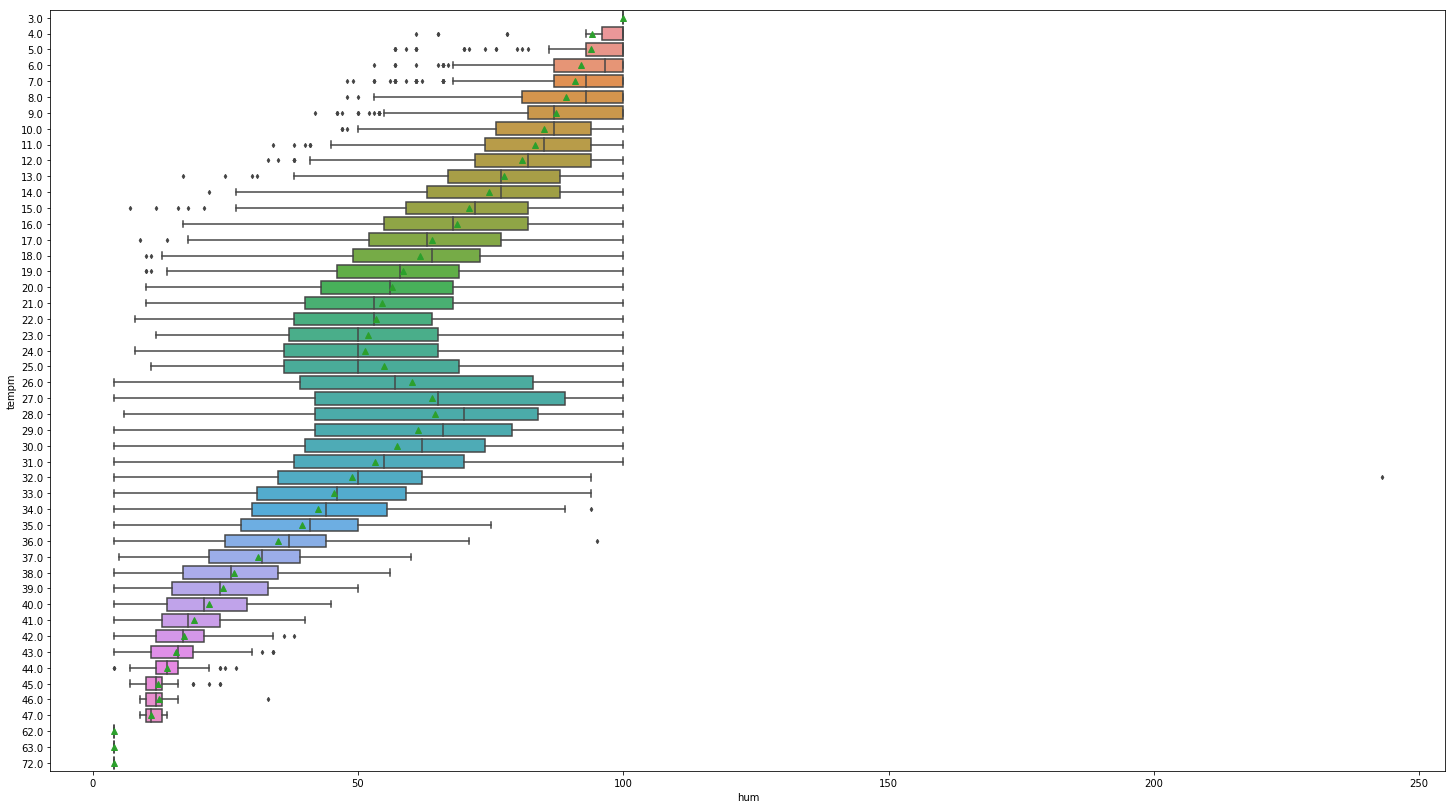

In [15]:
#outliers detection before filling the null values with mean or median
fig, ax = plt.subplots(figsize=(25,14))
sns.boxplot(x = 'hum',y='tempm', data = data, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

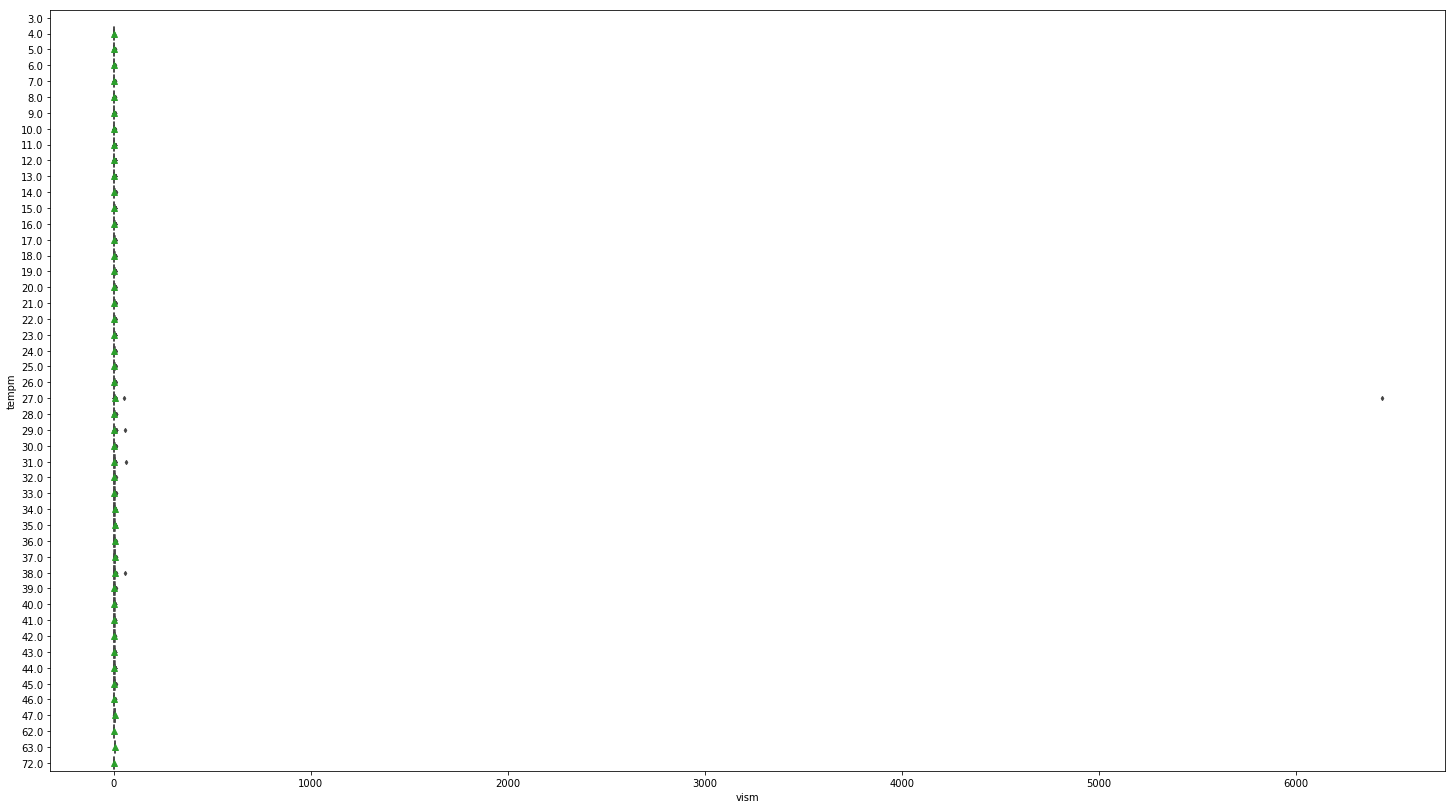

In [16]:
fig, ax = plt.subplots(figsize=(25,14))
sns.boxplot(x = 'vism',y='tempm', data = data, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

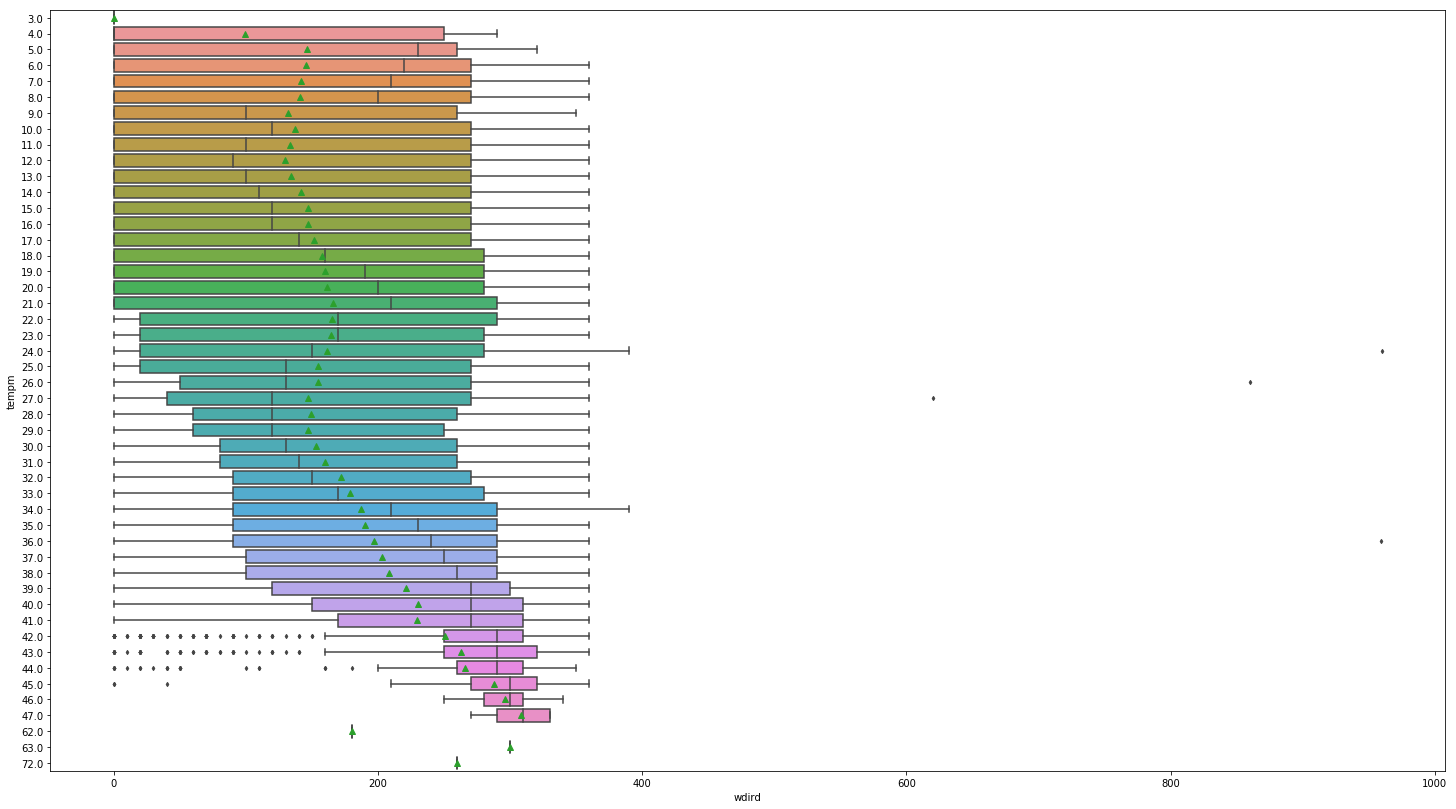

In [17]:
fig, ax = plt.subplots(figsize=(25,14))
sns.boxplot(x = 'wdird',y='tempm', data = data, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

Since there are a few outliers we can ignore them

In [18]:
#replacing the null values with mean values since mean and median values predicted the same accuracy of the model and
#with less number of outliers in the model
mean_dewptm=data['dewptm'].mean()
data['dewptm']=data['dewptm'].fillna(mean_dewptm)

mean_hum=data['hum'].mean()
data['hum']=data['hum'].fillna(mean_hum)

mean_pressurem=data['pressurem'].mean()
data['pressurem']=data['pressurem'].fillna(mean_pressurem)

mean_vism=data['vism'].mean()
data['vism']=data['vism'].fillna(mean_vism)

mean_tempm=data['tempm'].mean()
data['tempm']=data['tempm'].fillna(mean_tempm)

mean_wspdm=data['wspdm'].mean()
data['wspdm']=data['wspdm'].fillna(mean_wspdm)

In [19]:
#checking the number of null values left
data.isnull().sum()

conds        58
dewptm        0
fog           0
hail          0
hum           0
pressurem     0
rain          0
snow          0
tempm         0
thunder       0
tornado       0
vism          0
wdird         0
wdire         0
wspdm         0
dtype: int64

In [20]:
#replacing null values in categorical column - conds with value ""
data['conds'] = data['conds'].fillna('Other_unknown')
data.isnull().sum()

conds        0
dewptm       0
fog          0
hail         0
hum          0
pressurem    0
rain         0
snow         0
tempm        0
thunder      0
tornado      0
vism         0
wdird        0
wdire        0
wspdm        0
dtype: int64

### Handling Categorical values - conds and wdire

In [21]:
data['conds'].unique() # got more unique result 

array(['Smoke', 'Clear', 'Haze', 'Unknown', 'Scattered Clouds',
       'Shallow Fog', 'Mostly Cloudy', 'Fog', 'Partly Cloudy',
       'Patches of Fog', 'Thunderstorms and Rain', 'Overcast', 'Rain',
       'Light Rain', 'Light Drizzle', 'Drizzle', 'Mist', 'Volcanic Ash',
       'Thunderstorm', 'Light Thunderstorms and Rain',
       'Light Thunderstorm', 'Squalls', 'Heavy Rain', 'Light Haze',
       'Sandstorm', 'Widespread Dust', 'Funnel Cloud',
       'Heavy Thunderstorms and Rain', 'Heavy Thunderstorms with Hail',
       'Light Rain Showers', 'Thunderstorms with Hail', 'Other_unknown',
       'Partial Fog', 'Heavy Fog', 'Light Fog', 'Blowing Sand',
       'Light Hail Showers', 'Light Sandstorm', 'Light Freezing Rain',
       'Rain Showers'], dtype=object)

In [22]:
# to check count of the distinct categories within the feature 
print(data['conds'].value_counts().count())

40


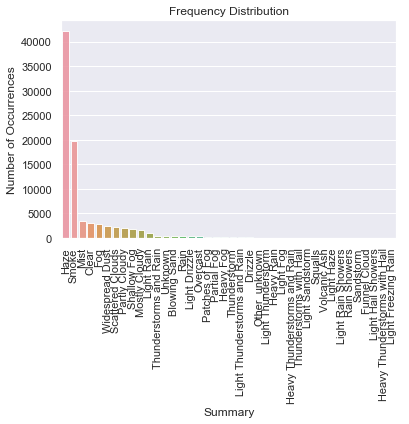

In [23]:
#plotting categorical values using bar plots
carrier_count = data['conds'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Summary', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [24]:
#handling categorical values groupin it under "others" column
data['conds']=np.where(data["conds"].isin(['Unknown', 'Scattered Clouds',
       'Shallow Fog', 'Mostly Cloudy', 'Fog', 'Partly Cloudy',
       'Patches of Fog', 'Thunderstorms and Rain', 'Overcast', 
       'Light Rain', 'Light Drizzle', 'Drizzle',  'Volcanic Ash',
       'Thunderstorm', 'Light Thunderstorms and Rain',
       'Light Thunderstorm', 'Squalls', 'Heavy Rain', 'Light Haze',
       'Sandstorm', 'Widespread Dust', 'Funnel Cloud',
       'Heavy Thunderstorms and Rain', 'Heavy Thunderstorms with Hail',
       'Light Rain Showers', 'Thunderstorms with Hail', 'Other',
       'Partial Fog', 'Heavy Fog', 'Light Fog', 'Blowing Sand',
       'Light Hail Showers', 'Light Sandstorm', 'Light Freezing Rain',
       'Rain Showers']),"Other_Conditions",data['conds'])

In [25]:
#checking if the values are all grouped under column "other_unknown"
data["conds"].value_counts()

Haze                42209
Smoke               19839
Other_Conditions    17230
Mist                 3394
Clear                3128
Rain                  377
Other_unknown          58
Name: conds, dtype: int64

Dummy variables (also known as an indicator variable, design variable, Boolean indicator, categorical variable, binary variable, or qualitative variable) is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome

In [26]:
#creating dummies variables and dropping the initial column - Summary
data=pd.get_dummies(data,columns=['conds'], drop_first= True)

In [27]:
data.head()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm,conds_Haze,conds_Mist,conds_Other_Conditions,conds_Other_unknown,conds_Rain,conds_Smoke
0,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.000000,280.0,West,7.400000,0,0,0,0,0,1
1,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,2.557252,0.0,North,9.007716,0,0,0,0,0,1
2,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,2.557252,0.0,North,9.007716,0,0,0,0,0,1
3,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.000000,0.0,North,9.007716,0,0,0,0,0,1
4,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.200000,0.0,North,0.000000,0,0,0,0,0,1


In [28]:
#handling wdire categorical values
data['wdire'].unique()

array(['West', 'North', 'SSW', 'WSW', 'NNE', 'SW', 'WNW', 'NW', 'SSE',
       'East', 'ENE', 'ESE', 'SE', 'NE', 'NNW', 'South', 'Variable'],
      dtype=object)

In [29]:
#checking the count of values for categorical values
data['wdire'].value_counts()

North       19034
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: wdire, dtype: int64

In [30]:
# to check count of the distinct categories within the feature 
print(data['wdire'].value_counts().count())

17


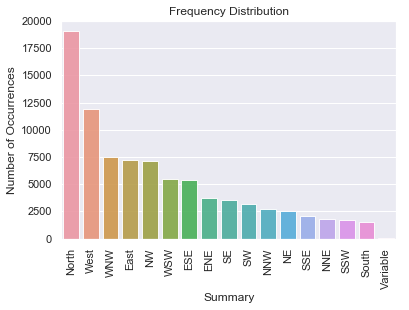

In [31]:
#plotting categorical values using a bar plots
carrier_count = data['wdire'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Summary', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [32]:
#handling categorical values groupin it under "others" column
data["wdire"]=np.where(data["wdire"].isin(['SSW', 'WSW', 'NNE', 'SW', 'WNW', 'NW', 'SSE',
        'ENE', 'ESE', 'SE', 'NE', 'NNW', 'Variable']),"Others",data["wdire"])

In [33]:
#checking if the values are all grouped under column "others"
data["wdire"].value_counts()

Others    46537
North     19034
West      11888
East       7233
South      1543
Name: wdire, dtype: int64

In [34]:
#creating dummies variables and dropping the initial column - Summary
data=pd.get_dummies(data,columns=['wdire'], drop_first= True)

In [35]:
# cross checking the count of values for categorical values
data.columns

Index(['dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow', 'tempm',
       'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'conds_Haze',
       'conds_Mist', 'conds_Other_Conditions', 'conds_Other_unknown',
       'conds_Rain', 'conds_Smoke', 'wdire_North', 'wdire_Others',
       'wdire_South', 'wdire_West'],
      dtype='object')

Feature scaling - It is a method done during pre-processing of data to range all the variables on the same scale either
in a range of 0-1 or a range of 1-10 so that all the features are on the same scale else it would be irrelevant to be 
comparing or building any kind  of models.

In [36]:
#feature scaling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)


In [37]:
data.head(10)

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,...,conds_Haze,conds_Mist,conds_Other_Conditions,conds_Other_unknown,conds_Rain,conds_Smoke,wdire_North,wdire_Others,wdire_South,wdire_West
0,0.333333,0.0,0.0,0.096234,0.000109,0.0,0.0,0.391304,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.343434,0.0,0.0,0.117155,0.000000,0.0,0.0,0.362319,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.353535,0.0,0.0,0.167364,0.000000,0.0,0.0,0.304348,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.343434,0.0,0.0,0.154812,0.000109,0.0,0.0,0.304348,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.353535,0.0,0.0,0.179916,0.000109,0.0,0.0,0.289855,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,0.363636,0.0,0.0,0.217573,0.000109,0.0,0.0,0.260870,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,0.373737,0.0,0.0,0.234310,0.000109,0.0,0.0,0.260870,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,0.373737,0.0,0.0,0.234310,0.000000,0.0,0.0,0.260870,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,0.373737,0.0,0.0,0.267782,0.000000,0.0,0.0,0.231884,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,0.373737,0.0,0.0,0.267782,0.000109,0.0,0.0,0.231884,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Feature Selection

Correlation matrix with heatmap helps us determine how the features are related to with each other. It can either be positive
or negative meaning increase in one of the value of features incraeses the target variable and decrease in one value of the 
feature decreases the value of target variable

In [38]:
corr=data.corr()
corr.sort_values(["tempm"], ascending = False, inplace = True)
print(corr.tempm)

tempm                     1.000000
dewptm                    0.511014
conds_Haze                0.401594
wspdm                     0.188605
wdire_Others              0.173152
wdird                     0.155818
wdire_South               0.051422
vism                      0.028285
pressurem                 0.004861
conds_Other_unknown       0.002104
tornado                   0.001102
snow                     -0.000032
hail                     -0.003773
thunder                  -0.008319
wdire_West               -0.010303
conds_Rain               -0.013583
rain                     -0.021656
conds_Other_Conditions   -0.129265
conds_Mist               -0.131384
wdire_North              -0.252385
conds_Smoke              -0.303134
fog                      -0.451268
hum                      -0.575128
Name: tempm, dtype: float64


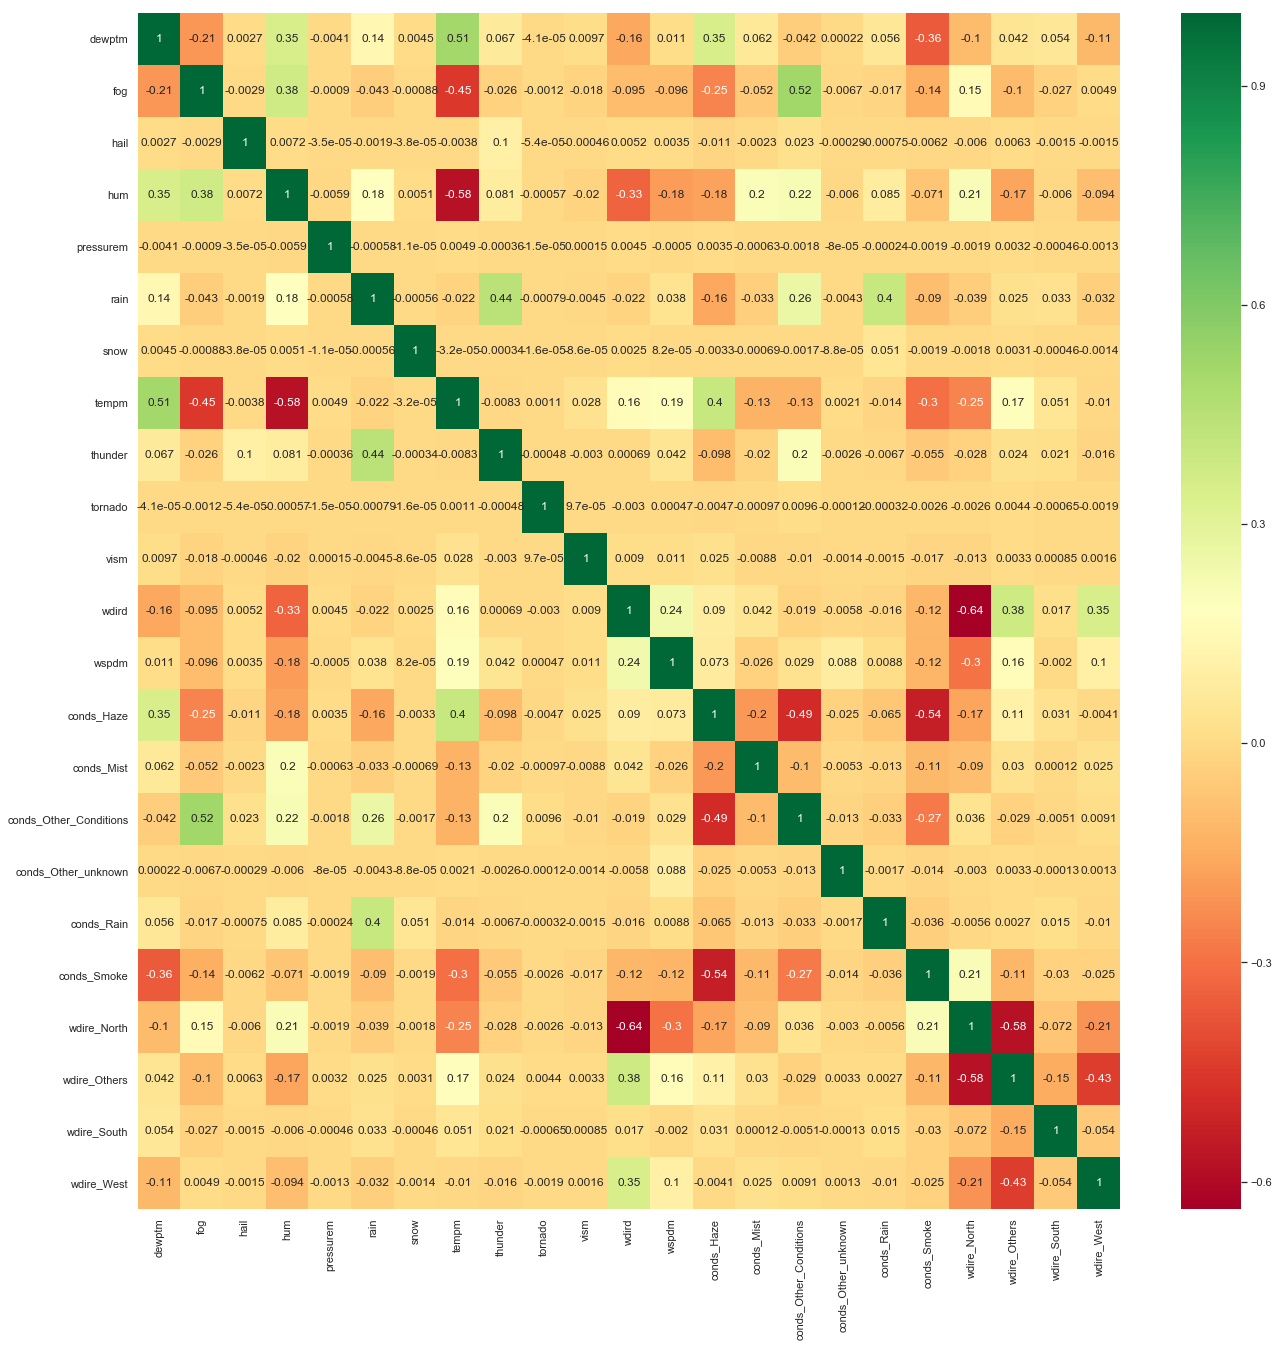

In [39]:
plt.figure(figsize=(22,22))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

Based on the observation from the above heatmap, dewptm is highly correlated with temperature (taking into consideration the basolute values) followed by hum, fog, conds_smoke,conds_Haze,wdird, wspdm, conds_smoke, wdire_North, smoke, conds_Mist, wdire_others. 

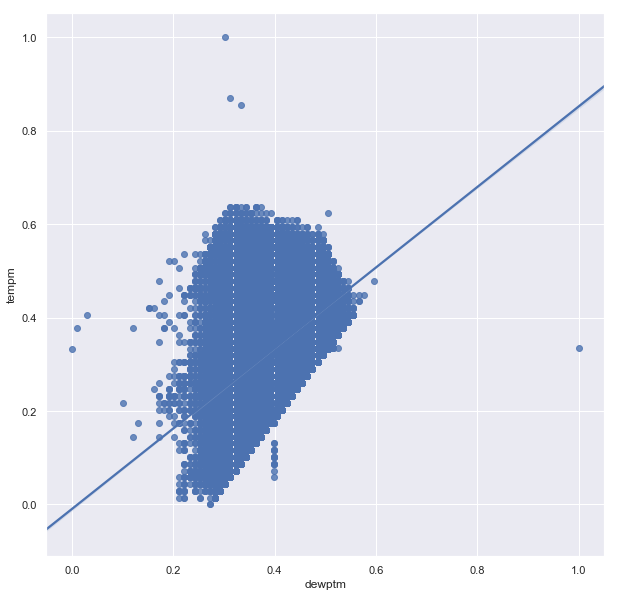

In [40]:
plt.figure(figsize=(10,10))
sns.regplot(x="dewptm", y="tempm", data=data)

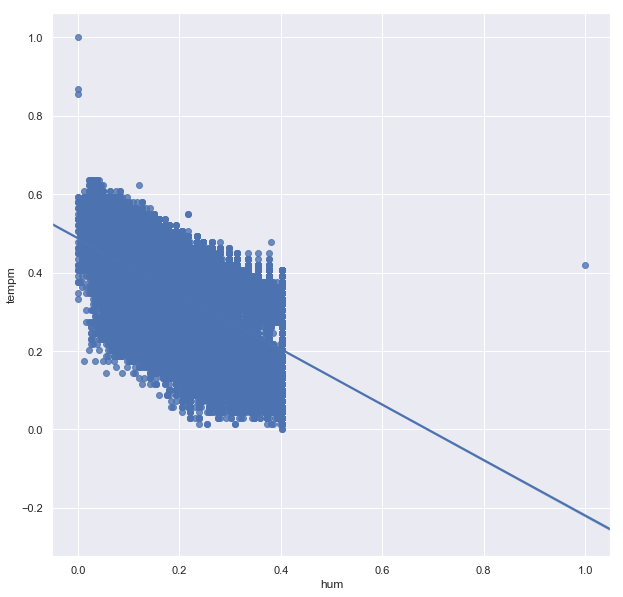

In [41]:
plt.figure(figsize=(10,10))
sns.regplot(x="hum", y="tempm", data=data)

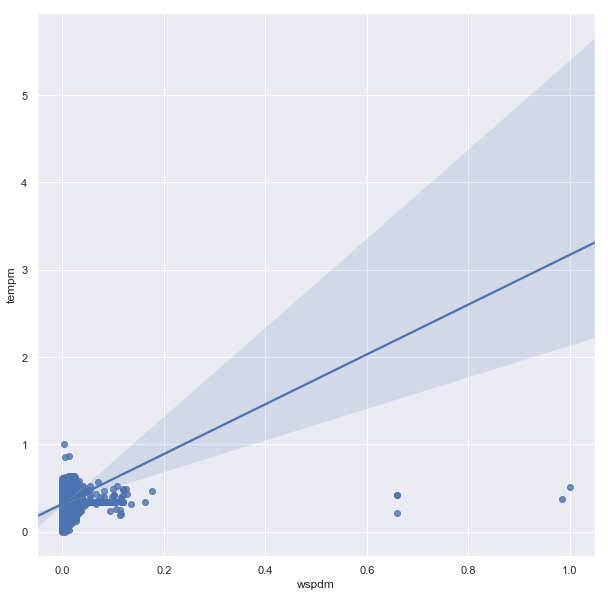

In [42]:
plt.figure(figsize=(10,10))
sns.regplot(x="wspdm", y="tempm", data=data)

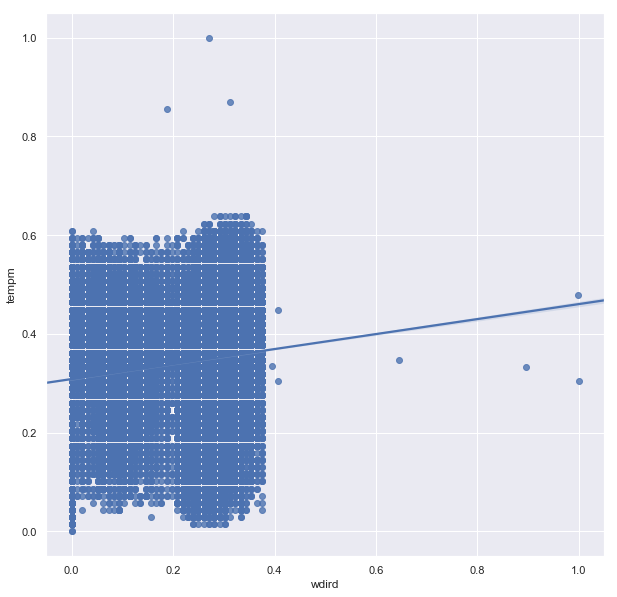

In [43]:
plt.figure(figsize=(10,10))
sns.regplot(x="wdird", y="tempm", data=data)

The above regplots shows how best the predictors are related or how it varies with the temperature or the target variable.
The plots shows that wdird, dewptm and wspdm varies atleast or a clear linear relationship with the temperature and the hum varies inversely with the temperature.

# Linear Regression

Target Variable - tempm (Temperature)

Linear regression is used for finding linear relationship between target and one or more predictors. One is predictor or independent variable and other is response or dependent variable.The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) is as small as possible. Error is the distance between the point to the regression line.

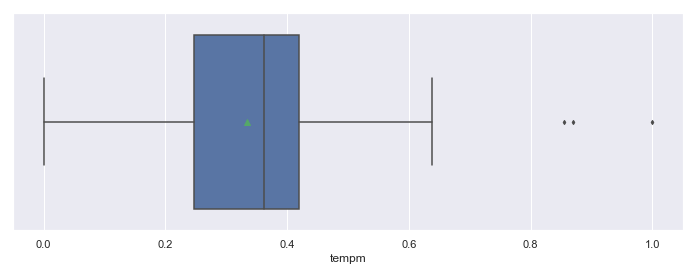

In [44]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'tempm', data = data, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

From this we understand that there are very few outliers towards the right of the third quartile range or minimum values with the mean at approximately 28 and interquartile range of 20-32

### Model 1

Considering the independent variables - 'dewptm','fog','hum','rain','wdird','wspdm','conds_Haze','conds_Smoke',
'conds_Mist','conds_Rain','wdire_North', 'wdire_Others', 'wdire_West' in predicting the target variable based on the correlation matrix or heatmap values as they are either positively or negatively correlated with the target variable

In [45]:
# Store independent and dependent variable in X, Y respectively
X = data[['dewptm','fog','hum','rain','wdird','wspdm','conds_Haze','conds_Smoke',
          'conds_Mist','conds_Rain','wdire_North', 'wdire_Others', 'wdire_West']]
Y = data[['tempm']]

In [46]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75)

In [47]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(64676, 13) (21559, 13) (64676, 1) (21559, 1)


In [48]:
#instantiate
regressor = linear_model.LinearRegression()

# Fitting the training set into simple linear regression
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

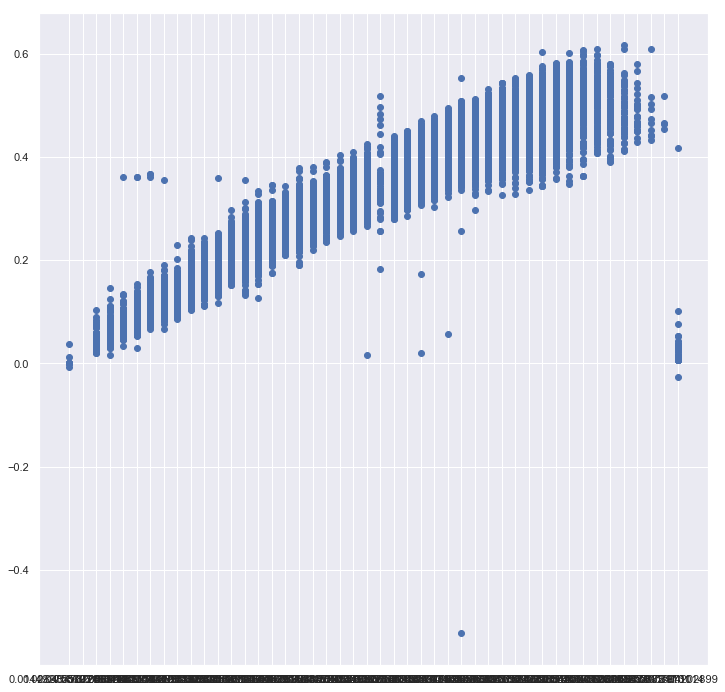

In [49]:
# Predicting the test set results
pred = regressor.predict(X_test)
plt.figure(figsize=(12,12))
plt.scatter(Y_test,pred)

In [50]:
#intercept
print(regressor.intercept_)

#coefficient
print(regressor.coef_)

[0.04901158]
[[ 1.37118527 -0.00447721 -1.08769951 -0.00935241 -0.00233953  0.20681651
  -0.03169525 -0.04447604 -0.02678442  0.01087077  0.00531376 -0.00165931
  -0.00321011]]


Mean squared error tells you how close the regression line is to a set of points, lesser the MSE better will be model,
line of best fit

In [51]:
#mean squared error
np.mean((Y_test - pred)**2)

tempm    0.001184
dtype: float64

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, pred)

0.0011843461574381554

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.

In [53]:
from sklearn import metrics 
print(np.sqrt(metrics.mean_squared_error(Y_test, pred)))

0.034414330698680676


Mean Absolute Error - Represents average error

In [54]:
print(metrics.mean_absolute_error(Y_test, pred))

0.023246921118179747


In [55]:
#Our model needs an intercept so we add a column of it
X = sm.add_constant(X)

In [56]:
# Statistical data exploration
model = sm.OLS(Y,X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempm   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 8.038e+04
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:36:22   Log-Likelihood:             1.7024e+05
No. Observations:               86235   AIC:                        -3.404e+05
Df Residuals:                   86221   BIC:                        -3.403e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0488      0.001     49.116   

R squared - for evalauting the goodness of the fit. It implies how much of a change in Y is impacted by the amount of change in X..

R squared values - 0.924, 
Adjacent R squared values - 0.924
R sqaured and Adjacent Rsquared evaluates the goodness of the fit, closer the values of R squared to 1 or higher the R squared, better will be the model and the variations in the output /target variable will be explained by the input features.
From the above model, we see that p values of most of the predictors are higly significant except for the features - 
wdird, wdire_Others and wdire_west with values -2.101,-4.210 and -6.549 respectively

AIC & BIC - estimates the quality of each modle wrt other models and provides us a means for seletion of the models. Lower
the AIC and BIC values its better.

In [57]:
#Applying K-fold cross validation
from sklearn.model_selection import cross_val_score # To perform cross validation
score = cross_val_score(regressor,X_test,Y_test, cv = 5)
print('accuracy_test:' +str(score.mean()*100))

score = cross_val_score(regressor,X_train,Y_train, cv = 5)
print('accuracy_train:' +str(score.mean()*100))

accuracy_test:91.95353708410558
accuracy_train:92.46782823645934


K-fold cross validation is a simple, intuitive way to estimate prediction error. K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data for validation. We then average the model against each of the folds and then finalize our model. After that we test it against the test set..

The accuracy of the model here is 92.4% which indicates that the model is a good estimator of the target variable

## Model 2 

On removing features - wdird, wdrire_others, wdire_west...

In [58]:
# Store independent and dependent variable in X, Y respectively
X = data[['dewptm','fog','hum','rain','wspdm','conds_Haze','conds_Smoke',
          'conds_Mist','conds_Rain','wdire_North']]
Y = data[['tempm']]

In [59]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75)

In [60]:
# Fitting the training set into simple linear regression
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

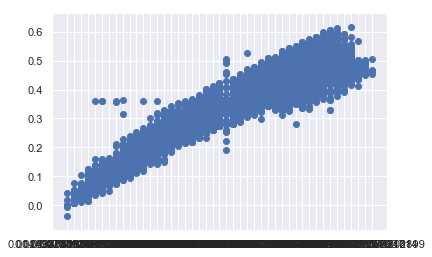

In [61]:
# Predicting the test set results
pred = regressor.predict(X_test)
plt.scatter(Y_test,pred)

In [62]:
#MSE
from sklearn import metrics 
print(metrics.mean_squared_error(Y_test,pred))

0.0011232833658703233


In [63]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test, pred)))

0.03351541982237912


In [64]:
#Our model needs an intercept so we add a column of it
X = sm.add_constant(X)

In [65]:
# Statistical data exploration
model = sm.OLS(Y,X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempm   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.044e+05
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:36:48   Log-Likelihood:             1.7020e+05
No. Observations:               86235   AIC:                        -3.404e+05
Df Residuals:                   86224   BIC:                        -3.403e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0449      0.001     55.948      

From the above table, it shows that the values of R squared and adjacent R squared remains the same as the previous model and
the same goes with the values of AIC and BIC. Most of the predictors are highly significant and removing the features with least t scores - fog and rain with least t scores to test if the accuracy increases or not.

In [66]:
#Applying K-fold cross validation
from sklearn.model_selection import cross_val_score # To perform cross validation
score = cross_val_score(regressor,X_test,Y_test, cv = 5)
print('accuracy_test:' +str(score.mean()*100))

#to confirm if there is any overfitting in the model
score = cross_val_score(regressor,X_train,Y_train, cv = 5)
print('accuracy_train:' +str(score.mean()*100))

accuracy_test:92.3261499146389
accuracy_train:92.35420962043763


The accuracy of the model here is 92.3% - same from the previous model and also RMSE remains the same from the previous model
0.033.

### Model - 3

On removing features - fog and rain,,

In [67]:
# Store independent and dependent variable in X, Y respectively
X = data[['dewptm','hum','wspdm','conds_Haze','conds_Smoke',
          'conds_Mist','conds_Rain','wdire_North']]
Y = data[['tempm']]

In [68]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [69]:
# Fitting the training set into simple linear regression
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

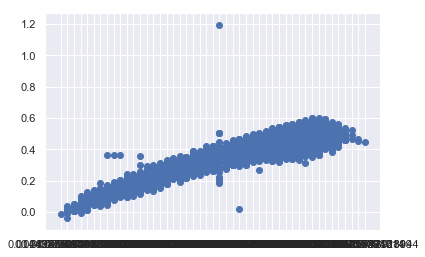

In [70]:
# Predicting the test set results
pred = regressor.predict(X_test)
plt.scatter(Y_test,pred)

In [71]:
#Our model needs an intercept so we add a column of it
X = sm.add_constant(X)

In [72]:
# Statistical data exploration
model = sm.OLS(Y,X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempm   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.303e+05
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:37:04   Log-Likelihood:             1.7012e+05
No. Observations:               86235   AIC:                        -3.402e+05
Df Residuals:                   86226   BIC:                        -3.401e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0430      0.001     58.392      

In [73]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test, pred)))

0.03398489993386533


In [74]:
#Applying K-fold cross validation
score = cross_val_score(regressor,X_test,Y_test, cv = 5)
print('accuracy_test:' +str(score.mean()*100))

score = cross_val_score(regressor,X_train,Y_train, cv = 5)
print('accuracy_train:' +str(score.mean()*100))

accuracy_test:92.10372775686278
accuracy_train:92.40705843393


The accuracy of the model still remains the same  92.1% and remains almost the same from the previous model with a slightest difference of 0.1%, RMSE values - 0.0339.

This model seems to be the best so far since the RMSE value for this model is - 0.0011 and the accuracy and AIC and BIC
values remains the same so far for all the 3 regression models so far.

Based on our observation, for all the three models the RMSE score is 0.033 , R squared value is - 0.924 and accuracy of the 
model varies around 92.1%- 92.29%

The features such as 'dewptm','hum','wspdm','conds_Haze','conds_Smoke',
          'conds_Mist','conds_Rain','wdire_North' are significant in predicting the target variable.

### Regularization

This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero.

Ridge regression is modified by adding the shrinkage quantity and the coefficients are estimated by minimizing this function. Here, λ is the tuning parameter that decides how much we want to penalize the flexibility of our model.It adds “squared magnitude” of coefficient as penalty term to the loss function. 

Lasso Regression adds “absolute value of magnitude” of coefficient as penalty term to the loss function.
Regularization, significantly reduces the variance of the model, without substantial increase in its bias.


#### Continuing with the same set of independant features from the Model 3 of Linear Regression---

In [ ]:
# Store independent and dependent variable in X, Y respectively
X = data[['dewptm','hum','wspdm','conds_Haze','conds_Smoke',
          'conds_Mist','conds_Rain','wdire_North']]
Y = data[['tempm']]

In [ ]:
#splitting test set and train set
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

### Ridge Regression

Trying out aplha value - 0.01

In [77]:
# Fitting regression to training set
#higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely restricted and in this case 
#linear and ridge regression resembles
from sklearn.linear_model import Ridge
regression = linear_model.Ridge(alpha=0.01, normalize=True) 
regression.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [78]:
# Predicting the test set results
pred = regression.predict(X_test)

In [79]:
accuracy_test = cross_val_score(estimator=regression, X=X_test, y=y_test, cv=5)
accuracy_test.mean()*100

92.31309776577177

In [80]:
metrics.mean_squared_error(Y_test, pred)

0.027676407506566466

In [81]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test, pred)))

0.16636227789546063


In [82]:
# Statistical data exploration
model = sm.OLS(Y,X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempm   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.149e+06
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:37:32   Log-Likelihood:             1.6845e+05
No. Observations:               86235   AIC:                        -3.369e+05
Df Residuals:                   86227   BIC:                        -3.368e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
dewptm          1.4714      0.001   1326.737      

The accuracy score - 92% closely same as that from the Linear models 92% and also the value of R and R squared increased to 0.991, along with the value of RMSE slightly increased to - 0.16

### Using Grid Search to find out the best value of hyperparameter - alpha for ridge regression

Grid-search is the used for finding the best or optimal hyperparameters for the model.
(to calculate the best parameters to use for any given model). It actually builds a combination of hyperparameters specified
and evaluates the model.

In [83]:
from sklearn.model_selection import GridSearchCV
#assigning various values of alpha to check for the best value
alphas = np.array([0.001,0.01,0.0005,0.0025,0.0,0.0025])
grid_search = GridSearchCV(estimator = regression,
                           param_grid = dict(alpha=alphas),
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.001 , 0.01  , 0.0005, 0.0025, 0.    , 0.0025])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [84]:
print('best parameter:', (grid_search.best_params_))

best parameter: {'alpha': 0.01}


Assuming the value of alpha as 0.01 in the first model or ridge regression is true, as the best value of alpha was predicted 
to be 0.01 by Grid Search

Applying different values of alpha --

In [85]:
rr = linear_model.Ridge(alpha=0.1, normalize=True) 
rr.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [86]:
# Predicting the test set results
pred = rr.predict(X_test)

In [87]:
accuracy_test = cross_val_score(estimator=rr, X=X_test, y=y_test, cv=5)
accuracy_test.mean()*100

90.1532450969459

In [88]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test, pred)))

0.15764281920830858


The accuracy score - 90.15 and 92.313 closely same as that of regression models - 92% (with 2% variation) for different values of alpha such as 0.01 and 0.001, the RMSE score for the above models - 0.166 and 0.15 much higher than the linear models. Although the R squared value increases to 0.991.

### Multicollinearity

 Multicollinearity occurs when independent variable in a regression model are related.
To find out if there is any multicollinearity in the model, we use Variance Inflation factor to identify if there are any 
correlation between indepedent variables and strength of the correlation.

In [92]:
X = data[['dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'conds_Haze',
       'conds_Mist', 'conds_Other_Conditions', 'conds_Other_unknown',
       'conds_Rain', 'conds_Smoke', 'wdire_North', 'wdire_Others',
       'wdire_South', 'wdire_West']]

In [93]:
vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,34.4,dewptm
1,2.1,fog
2,1.0,hail
3,11.3,hum
4,1.0,pressurem
5,1.8,rain
6,1.0,snow
7,1.3,thunder
8,1.0,tornado
9,1.0,vism


Considering only the features of LR Model 3 features to check if there exists any multicollinearity in the model --

In [95]:
X = data[['dewptm','hum','wspdm','conds_Haze','conds_Smoke',
          'conds_Mist','conds_Rain','wdire_North']]

In [96]:
vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,14.9,dewptm
1,8.4,hum
2,1.7,wspdm
3,3.6,conds_Haze
4,1.8,conds_Smoke
5,1.2,conds_Mist
6,1.0,conds_Rain
7,1.5,wdire_North


The features with values less than 5 is said to have no multicollinearity or no relation amongst the independent variables. The values more than 5 or higher the values the higher they are correlated with each other.

## Interaction Effects

### Model 1

An interaction variable is a variable constructed from an original set of variables to try to represent either all of the interaction present or some part of it. An interaction variable models the simultaneous influence of two predictors on a third response variable is not additive. We want to know whether the joint effect is higher than the sum of both effects. An an interaction may arise when considering the relationship among three or more variables, and describes a situation in which the simultaneous influence of two variables on a third is not additive.

In [97]:
data['dewptm*hum'] = data['dewptm']*data['hum']

In [98]:
# Store independent and dependent variable in X, Y respectively
# Store independent and dependent variable in X, Y respectively
X = data[['dewptm*hum','wspdm','conds_Haze','conds_Smoke',
          'conds_Mist','conds_Rain','wdire_North']]
Y = data[['tempm']]

In [99]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [100]:
# Create a linear regression object
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
y_pred = regressor.predict(X_test)

In [102]:
#MSE
metrics.mean_squared_error(Y_test,y_pred)

0.010613918038336686

In [103]:
#RMSE
np.sqrt(metrics.mean_squared_error(Y_test,y_pred))

0.10302387120632134

In [104]:
result = sm.OLS(Y,X).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempm   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 5.290e+04
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:43:54   Log-Likelihood:                 38581.
No. Observations:               86235   AIC:                        -7.715e+04
Df Residuals:                   86228   BIC:                        -7.708e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
dewptm*hum      1.1285      0.009    128.571      

The RMSE - 0.103, MSE - 0.0106, R squared - 0.811 values after checking for multicollinearity in the model and applying regression algorithm. The RMSE score has increased from 0.033 to 0.103, also R squared values has decreased from 0.924 to 0.811 because of the multicollinearity in the model. Although the p values and t values are good, indicating that all the predictors are highly significant including the interaction term - dewptm * hum with a high t score.

Hence this model does not have any multicollinearity, with all the significant predictors predicting the target variable as
well, with dewptm, humidity, conds_Haze, mist,smoke being the good predictors of the model

## Random Forest Regression

Based on the features selected from Model 1 in Linear Regression --

Random forest is a Supervised Learning algorithm which uses ensemble learning method - bagging technique
for classification and regression.

In [119]:
# Store independent and dependent variable in X, Y respectively
X = data[['dewptm','fog','hum','rain','wdird','wspdm','conds_Haze','conds_Smoke',
          'conds_Mist','conds_Rain','wdire_North', 'wdire_Others', 'wdire_West']]
Y = data[['tempm']]

In [120]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [121]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [122]:
#cross validation
score = cross_val_score(regressor , X_test ,Y_test, cv = 5)  
print('Accuracy Score test:' + str(score.mean()*100))

#to check the training score to test for overfitting of the model
score = cross_val_score(regressor , X_train ,Y_train, cv = 5)  
print('Accuracy Score train:' + str(score.mean()*100))

Accuracy Score test:96.84751721625051
Accuracy Score train:97.43747684490958


In [123]:
mse = mean_squared_error(Y_test, regressor.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.0004


In [124]:
np.sqrt(metrics.mean_squared_error(Y_test,regressor.predict(X_test)))

0.019543784209626432

The MSE and RMSE values of the model are - 0.0004 and 0.01954 respectively for the Random Forest regression model which is comparitively much lesser than the RMSE value of the Linear Regression models  - 0.0333.

### To find Hyperparameters using Randomized Search Algo --

Using RandomizedSearch Algo to find the optimal hyperparameters from the specified set of parameters.
max_depth refers to the maximum depth of the tree,n_estimators, the number of trees in the forest, max_features, etc

In [125]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [182]:
# Use the random grid to search for best hyperparameters
regressor = RandomForestRegressor()
#using 3 fold cross validation from different combinations 10*3
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 10, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 26.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [183]:
#finding the best parameters
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [126]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 2000, random_state = 0,min_samples_split=5,min_samples_leaf= 2,
 max_features = 'auto',max_depth = 50,bootstrap = True)
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [127]:
#cross validation score
score = cross_val_score(regressor , X_test ,Y_test, cv = 3)  
print('Accuracy Score:' + str(score.mean()*100))

Accuracy Score:97.00261839291932


In [128]:
mse = mean_squared_error(Y_test, regressor.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.0003


The best hyperparameters for this particular Random forest regression are - max_depth, n_estimators,max_features, min_samples_split, min_samples_leaf, bootstrap.

The MSE value for the Random Forest model which is much lesser than the MSE values of the regression models - 0.001 and ridge 
regression model are 0.0003.

### Gradient Boosting Regression

In [44]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [45]:
X = data[['dewptm','fog','hum','rain','wdird','wspdm','conds_Haze','conds_Smoke',
          'conds_Mist','conds_Rain','wdire_North', 'wdire_Others', 'wdire_West']]
Y = data[['tempm']]

In [46]:
# Split dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [50]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,'min_samples_leaf':2,
          'learning_rate': 0.01,'max_features':'auto'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, Y_train)
mse = mean_squared_error(Y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.0005


In [52]:
#cross validation score
score = cross_val_score(clf , X_test ,Y_test, cv = 5)  
print('Accuracy Score:' + str(score.mean()*100))

Accuracy Score:96.69017546188249


Trying out different hyperparameter values - manually changing the values based on the hyperparameter values from 

In [54]:
params = {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 10,'min_samples_leaf':10,
          'learning_rate': 0.001,'max_features':'sqrt'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, Y_train)
mse = mean_squared_error(Y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.0032


In [55]:
#cross validation score
score = cross_val_score(clf , X_test ,Y_test, cv = 5)  
print('Accuracy Score:' + str(score.mean()*100))

Accuracy Score:77.55482915797704


Best Hyperparameter values can be found using Randomized search algo

In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
# Use the random grid to search for best hyperparameters
clf = ensemble.GradientBoostingRegressor(**random_grid)
#using 3 fold cross validation from different combinations 10*3
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 2, 
                               cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 75.4min finished


In [ ]:
#finding the best parameters
rf_random.best_params_

In [ ]:
params = {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 5,
          'learning_rate': 0.01,'max_features':'auto'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, Y_train)
mse = mean_squared_error(Y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

In [ ]:
#cross validation score
score = cross_val_score(clf , X_test ,Y_test, cv = 5)  
print('Accuracy Score:' + str(score.mean()*100))

The MSE values of the gradient boosting regression - 0.005 and 0.0032 which is much lesser than the MSE values of the regression model but higher than the MSE values of random forest regression models

## Conclusion

Answer the following questions for all of the models:
* Is the relationship significant?
    Yes, the relationship is significant for all the models (Linear Regression models, Regularization models, GBM model and Random Forest models), in predicting the target variable using the independant variables/features. Considering R squared values, z score, p values, accuracy score of the model, AIC and BIC values of the model as evaluation metrics in eliminating the insignificant features (based on the z score and p values) and predicting the best model with significant features.
                                                                        
                                                                        
* Are any model assumptions violated?
Initial assumprions - The linearity between the independent and the target variable, this particular model assumption was not violated. There exists linearity between the target variable and its predictors in the data.
No multicollinearity exists in the models.Initially yes, there existed multicollinearity (found out by VIF) in the models (Linear Regression models), on adding the interaction term - a product of two highly correlated feature have eliminated the multicollinearity from the models.Hence no assumptions was violated at the end.
                                                                                    
                                                  
* Is there any multi-collinearity in the model?
Yes, there exists multicollinearity in the model.                                                                    
                                                     
* In the multivariate models are predictor variables independent of all the other predictor variables?
No, not all the predictor variable are indepndent of the other predictor variables (like dewptm and hum were highly correlated with each other).                       
                        
                        
                        
* In in multivariate models rank the most significant predictor variables and exclude insignificant ones
* from the model.
the order is as follows - dewptm, conds_Haze, wspdm, hum, conds_Smoke, wdire_North, conds_Mist.


* Does the model make sense?
yes, all the above models makes sense.

* Does regularization help?
no, Regularization dint help my models. 

* Which independent variables are significant?
dewptm, hum, wspdm, conds_Haze,conds_Smoke, conds_Mist, conds_Rain, wdire_North are all the significant variables.


* Which hyperparameters are important?
For Regularization models hyperparameter - alpha is significant.
For Random Forest model, the important Hyperparameters are - max_depth, n_estimators, min_samples_leaf, max_features, min_samples_split
For GBM, important Hyperparameters are -  max_depth, n_estimators, min_samples_leaf, max_features, min_samples_split

## Contributions

1. Performed Data Cleaning by removing the null values from the columns or replacing them with placeholder values for both numerical and categorical data and did feature scaling to normalize all the values in the dataset to bring them to a range of 0-1.                                                                      
2. Performed stepwise regression -  backward elimination method using e variables using the correlation function and tried to improve the RMSE, MSE, MAE scores.
3. Performed Ridge regularization technique on the variables for different values of alpha (Hyperparameter tuning using gridsearch).
4. Implemented interaction variable in the regression model for the variables with high correlated with each other.
5. Tuned the hyperparameters for both the Random Forest Regression and Gradient Boosting Regression algorithms.

# Citations

1. https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Linear_Regression.ipynb                              
2. https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4
3. https://stattrek.com/multiple-regression/multicollinearity.aspx
4. https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab
5. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
6. https://medium.com/@ODSC/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead
7. Regularization :https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
8. https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Regularization.ipynb
9. https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
10. https://www.datacareer.ch/blog/parameter-tuning-in-gradient-boosting-gbm-with-python/

## LICENSE

Copyright 2020, Chaitanya Prasanna Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.